In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install TA-Lib


--2024-05-03 06:00:16--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-05-03 06:00:16--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cytranet-dal.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-05-03 06:00:16--  http://cytranet-dal.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1

In [ ]:
# Date Alignment:
import pandas as pd
import numpy as np
import yfinance as yf
import talib as ta

In [ ]:
# data=pd.read_csv('/content/drive/MyDrive/DataSets/raw_analyst_ratings.csv')
stock=pd.read_csv('/content/drive/MyDrive/DataSets/stockdata.csv')
sentiment= pd.read_csv('/content/drive/MyDrive/DataSets/sentiment_data.csv')

In [ ]:
sentiment.head()

,Unnamed: 0.1,Unnamed: 0,headline,url,publisher,date,stock,headline_length,headline_new,sentiment
0,0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,39,stock hit 52-week high friday,0
1,1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A,42,stock hit 52-week high wednesday,0
2,2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A,29,71 biggest mover friday,0
3,3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A,44,46 stock moving friday 's mid-day session,0
4,4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A,87,b security maintains neutral agilent technolog...,0


In [ ]:
sentiment.drop(sentiment.columns[sentiment.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [ ]:
for column in ['headline', 'url', 'publisher', 'headline_length']:
    sentiment.drop(column, axis=1, inplace=True)

In [ ]:
sentiment.head()

,date,stock,headline_new,sentiment
0,2020-06-05,A,stock hit 52-week high friday,0
1,2020-06-03,A,stock hit 52-week high wednesday,0
2,2020-05-26,A,71 biggest mover friday,0
3,2020-05-22,A,46 stock moving friday 's mid-day session,0
4,2020-05-22,A,b security maintains neutral agilent technolog...,0


In [ ]:
sentiment.isnull().sum()

date            1351341
stock                 0
headline_new          0
sentiment             0
dtype: int64

In [ ]:
sentiment.dropna(axis=0, inplace=True)

In [ ]:
sentiment.isnull().sum()

date            0
stock           0
headline_new    0
sentiment       0
dtype: int64

In [ ]:
sentiment.shape

(1407328, 3)

In [ ]:
stock.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
stock        0
dtype: int64

In [ ]:
stock.head(30)

,Date,Open,High,Low,Close,Adj Close,Volume,stock
0,2020-05-22,85.000000,87.669998,84.199997,84.980003,84.056038,5063100.0,A
1,2020-05-26,86.230003,86.790001,85.639999,86.129997,85.193512,3173400.0,A
2,2020-05-27,86.300003,86.480003,84.370003,86.180000,85.242989,1917600.0,A
3,2020-05-28,86.870003,87.849998,86.059998,86.690002,85.747437,1908700.0,A
4,2020-05-29,87.169998,88.489998,86.470001,88.139999,87.181664,2394500.0,A
5,2020-06-01,88.040001,89.980003,87.940002,89.910004,88.932434,2477600.0,A
6,2020-06-02,90.000000,90.629997,89.110001,90.290001,89.308304,1682800.0,A
7,2020-06-03,90.650002,91.139999,90.260002,90.489998,89.506111,1382500.0,A
8,2020-06-04,89.820000,91.739998,89.820000,91.139999,90.149040,2227500.0,A
9,2020-05-18,7.070000,7.875000,7.010000,7.800000,7.783003,12915400.0,AA


In [ ]:
stock['Date'] = pd.to_datetime(stock['Date'])

In [ ]:
sentiment.rename(columns={'date': 'Date'}, inplace=True)

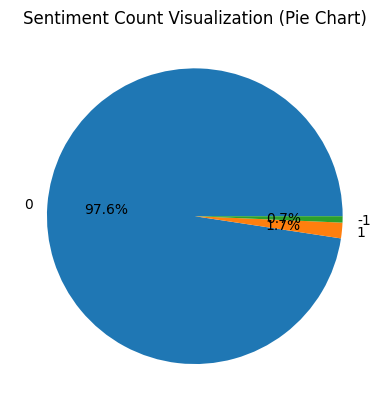

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = sentiment['sentiment'].value_counts()

# Create a pie chart to visualize the sentiment counts
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct="%1.1f%%")
plt.title('Sentiment Count Visualization (Pie Chart)')
plt.show()

In [ ]:
# filtering the data set
ticker_symbols = ["META", "GOOGL", "AAPL", "AMZN"]

# selecting rows based on condition
news = sentiment[sentiment['stock'].isin(ticker_symbols)]

print('\nResult dataframe :\n',
      news)


Result dataframe :
               Date  stock                                       headline_new  \
6680    2020-06-10   AAPL  tech stock faangs strong start day market awai...   
6681    2020-06-10   AAPL           10 biggest price target change wednesday   
6682    2020-06-10   AAPL  benzinga pro 's top 5 stock watch wed. , jun ....   
6683    2020-06-10   AAPL  deutsche bank maintains buy apple , raise pric...   
6684    2020-06-10   AAPL  apple let user trade mac computer credit u , c...   
6685    2020-06-10   AAPL      big tech reach new record height stock market   
6686    2020-06-09   AAPL                apple 's stock trading higher today   
6687    2020-06-09   AAPL  apple could announce in-house chip mac wwdc : ...   
6688    2020-06-09   AAPL  apple share trading higher despite market weak...   
6689    2020-06-09   AAPL  sonos share spike session high , 9.5 % , citro...   
76177   2020-06-10   AMZN  cannabis company cannaphyll marketing mass-con...   
76178   2020-06-10 

In [ ]:
# filtering the data set
ticker_symbols = ["META", "GOOGL", "AAPL", "AMZN"]

# selecting rows based on condition
stock_new = stock[stock['stock'].isin(ticker_symbols)]

print('\nResult dataframe :\n',
      stock_new)


Result dataframe :
               Date        Open        High         Low       Close  \
647     2020-06-09   83.035004   86.402496   83.002502   85.997498   
30864   2020-06-09  126.472000  131.321503  126.250000  130.042999   
428085  2020-06-04   71.838997   72.066002   70.300499   70.714996   
428086  2020-06-05   70.781998   72.315002   70.380997   72.000999   
428087  2020-06-08   71.314003   72.449997   71.223999   72.402000   
428088  2020-06-09   72.262001   73.389999   72.117996   72.603996   

         Adj Close       Volume  stock  
647      85.421921  147712400.0   AAPL  
30864   130.042999  103520000.0   AMZN  
428085   70.714996   26982000.0  GOOGL  
428086   72.000999   42642000.0  GOOGL  
428087   72.402000   33878000.0  GOOGL  
428088   72.603996   33624000.0  GOOGL  


In [ ]:
# date alignment
# Correlation between news and stock movement

#Tasks:
# Date Alignment: Ensure that both datasets (news and stock prices) are aligned by dates. This might involve normalizing timestamps.


In [ ]:
# Rename the 'date' column in the stock DataFrame to 'Date'
stock.rename(columns={'date': 'Date'}, inplace=True)

# Extract dates from news and stock price datasets
news_dates = news['Date']
stock_dates = stock_new['Date']

# Normalize timestamps
news_dates = pd.to_datetime(news_dates).dt.date
stock_dates = pd.to_datetime(stock_dates).dt.date

# Find overlapping date range
start_date = max(news_dates.min(), stock_dates.min())
end_date = min(news_dates.max(), stock_dates.max())
news['Date'] = pd.to_datetime(news['Date']).dt.date
stock_new['Date'] = pd.to_datetime(stock_new['Date']).dt.date

# Filter data based on overlapping date range
news = news[(news['Date'] >= start_date) & (news['Date'] <= end_date)]
stock_data = stock_new[(stock_new['Date'] >= start_date) & (stock['Date'] <= end_date)]

<ipython-input-88-39f1d1a16922>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_new['Date'] = pd.to_datetime(stock_new['Date']).dt.date
<ipython-input-88-39f1d1a16922>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stock_data = stock_new[(stock_new['Date'] >= start_date) & (stock['Date'] <= end_date)]


In [ ]:
# Merge the datasets on 'Date'
merged_data = pd.merge(news, stock_data, on='Date')


In [ ]:
merged_data.head()

,Date,stock_x,headline_new,sentiment,Open,High,Low,Close,Adj Close,Volume,stock_y
0,2020-06-09,AAPL,apple 's stock trading higher today,0,83.035004,86.402496,83.002502,85.997498,85.421921,147712400.0,AAPL
1,2020-06-09,AAPL,apple 's stock trading higher today,0,126.472000,131.321503,126.250000,130.042999,130.042999,103520000.0,AMZN
2,2020-06-09,AAPL,apple 's stock trading higher today,0,72.262001,73.389999,72.117996,72.603996,72.603996,33624000.0,GOOGL
3,2020-06-09,AAPL,apple could announce in-house chip mac wwdc : ...,0,83.035004,86.402496,83.002502,85.997498,85.421921,147712400.0,AAPL
4,2020-06-09,AAPL,apple could announce in-house chip mac wwdc : ...,0,126.472000,131.321503,126.250000,130.042999,130.042999,103520000.0,AMZN


In [ ]:
# Keep only the rows where 'stock_x' is equal to 'stock_y'
filtered_data = merged_data[merged_data['stock_x'] == merged_data['stock_y']]


In [ ]:
filtered_data.head()

,Date,stock_x,headline_new,sentiment,Open,High,Low,Close,Adj Close,Volume,stock_y
0,2020-06-09,AAPL,apple 's stock trading higher today,0,83.035004,86.402496,83.002502,85.997498,85.421921,147712400.0,AAPL
3,2020-06-09,AAPL,apple could announce in-house chip mac wwdc : ...,0,83.035004,86.402496,83.002502,85.997498,85.421921,147712400.0,AAPL
6,2020-06-09,AAPL,apple share trading higher despite market weak...,0,83.035004,86.402496,83.002502,85.997498,85.421921,147712400.0,AAPL
9,2020-06-09,AAPL,"sonos share spike session high , 9.5 % , citro...",0,83.035004,86.402496,83.002502,85.997498,85.421921,147712400.0,AAPL
13,2020-06-09,AMZN,'inside amazon 's plan test warehouse worker c...,0,126.472000,131.321503,126.250000,130.042999,130.042999,103520000.0,AMZN


In [ ]:
# Drop the 'stock_y' column
filtered_data = filtered_data.drop(columns=['stock_y'])


In [ ]:
filtered_data.head()

,Date,Ticker_symbol,headline_new,sentiment,Open,High,Low,Close,Adj Close,Volume
0,2020-06-09,AAPL,apple 's stock trading higher today,0,83.035004,86.402496,83.002502,85.997498,85.421921,147712400.0
3,2020-06-09,AAPL,apple could announce in-house chip mac wwdc : ...,0,83.035004,86.402496,83.002502,85.997498,85.421921,147712400.0
6,2020-06-09,AAPL,apple share trading higher despite market weak...,0,83.035004,86.402496,83.002502,85.997498,85.421921,147712400.0
9,2020-06-09,AAPL,"sonos share spike session high , 9.5 % , citro...",0,83.035004,86.402496,83.002502,85.997498,85.421921,147712400.0
13,2020-06-09,AMZN,'inside amazon 's plan test warehouse worker c...,0,126.472000,131.321503,126.250000,130.042999,130.042999,103520000.0


In [ ]:
filtered_data.rename(columns={'stock_x': 'Ticker_symbol'}, inplace=True)

In [ ]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

# Initialize the nltk sentiment intensity analyzer
nltk_analyzer = SentimentIntensityAnalyzer()

# Initialize a new column for nltk sentiment scores
filtered_data['nltk_sentiment'] = filtered_data['headline_new'].apply(lambda headline: nltk_analyzer.polarity_scores(headline))

# Initialize a new column for TextBlob sentiment scores
filtered_data['textblob_sentiment'] = filtered_data['headline_new'].apply(lambda headline: TextBlob(headline).sentiment.polarity)


In [ ]:
filtered_data.head()

,Date,Ticker_symbol,headline_new,sentiment,Open,High,Low,Close,Adj Close,Volume,nltk_sentiment,textblob_sentiment
0,2020-06-09,AAPL,apple 's stock trading higher today,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",83.035004,86.402496,83.002502,85.997498,85.421921,147712400.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.250000
3,2020-06-09,AAPL,apple could announce in-house chip mac wwdc : ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",83.035004,86.402496,83.002502,85.997498,85.421921,147712400.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000000
6,2020-06-09,AAPL,apple share trading higher despite market weak...,"{'neg': 0.0, 'neu': 0.79, 'pos': 0.21, 'compou...",83.035004,86.402496,83.002502,85.997498,85.421921,147712400.0,"{'neg': 0.0, 'neu': 0.79, 'pos': 0.21, 'compou...",0.050000
9,2020-06-09,AAPL,"sonos share spike session high , 9.5 % , citro...","{'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'comp...",83.035004,86.402496,83.002502,85.997498,85.421921,147712400.0,"{'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'comp...",0.053333
13,2020-06-09,AMZN,'inside amazon 's plan test warehouse worker c...,"{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'comp...",126.472000,131.321503,126.250000,130.042999,130.042999,103520000.0,"{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'comp...",0.000000


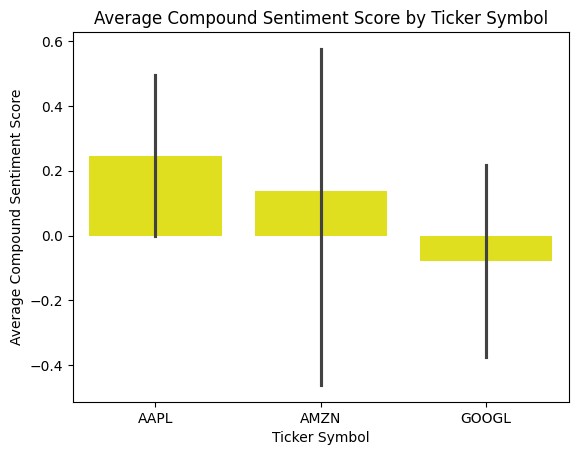

In [ ]:
import seaborn as sns
sns.barplot(x='Ticker_symbol', y='compound_sentiment', data=filtered_data, color='yellow')
plt.xlabel('Ticker Symbol')
plt.ylabel('Average Compound Sentiment Score')
plt.title('Average Compound Sentiment Score by Ticker Symbol')
plt.show()


AAPL: Shows a positive sentiment score, indicating favorable sentiment.
AMZN: Has a negative sentiment score, suggesting unfavorable sentiment.
GOOGL: Also positive but less than AAPL, reflecting moderately favorable sentiment.

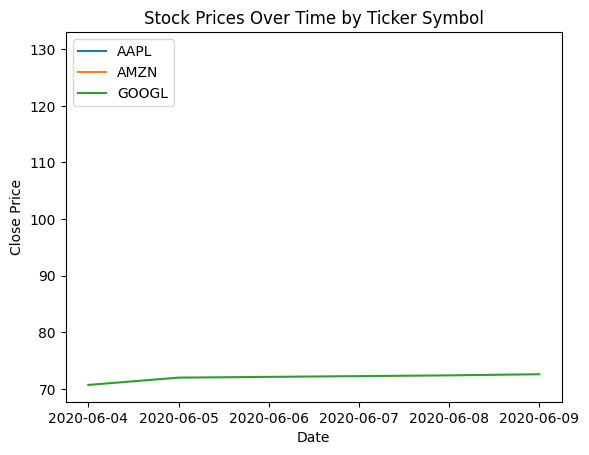

In [ ]:

for ticker in filtered_data['Ticker_symbol'].unique():
    temp_data = filtered_data[filtered_data['Ticker_symbol'] == ticker]
    plt.plot(temp_data['Date'], temp_data['Close'], label=ticker)

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Prices Over Time by Ticker Symbol')
plt.legend()
plt.show()


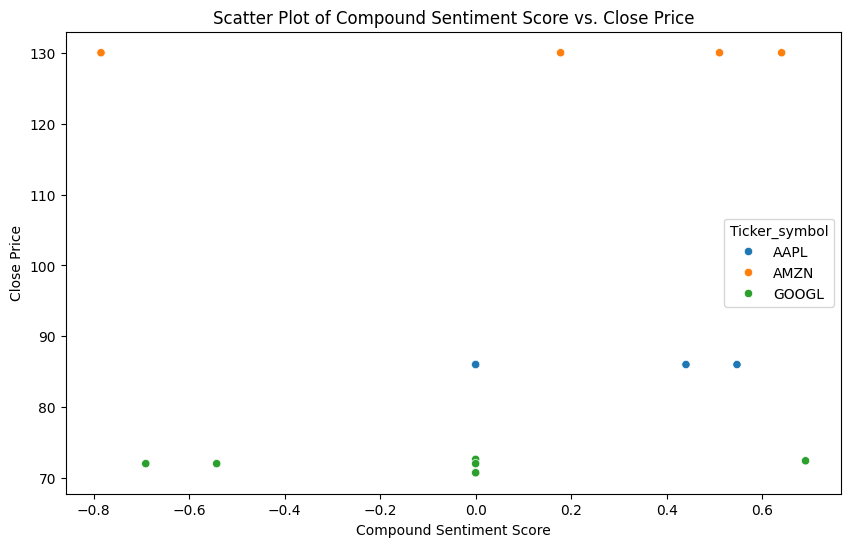

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='compound_sentiment', y='Close', hue='Ticker_symbol', data=filtered_data)
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Close Price')
plt.title('Scatter Plot of Compound Sentiment Score vs. Close Price')
plt.show()


AAPL: The orange dots representing AAPL are at higher close prices, suggesting a positive correlation between sentiment score and stock price.
AMZN and GOOGL: The blue and green dots, respectively, are scattered at lower close prices compared to AAPL, which may indicate a weaker or no clear correlation between sentiment scores and stock prices for these companies.

Analysis:
Calculate Daily Stock Returns: Compute the percentage change in daily closing prices to represent stock movements.
Correlation Analysis: Use statistical methods to test the correlation between daily news sentiment scores and stock returns.


In [ ]:
# Calculate daily returns
filtered_data['daily_return'] = filtered_data['Close'].pct_change()


In [ ]:
# Extract compound sentiment scores
filtered_data['compound_sentiment'] = filtered_data['sentiment'].apply(lambda x: x['compound'])

# Calculate correlation
correlation = filtered_data['daily_return'].corr(filtered_data['compound_sentiment'])


In [ ]:
filtered_data.head()

,Date,Ticker_symbol,headline_new,sentiment,Open,High,Low,Close,Adj Close,Volume,nltk_sentiment,textblob_sentiment,daily_return,compound_sentiment
0,2020-06-09,AAPL,apple 's stock trading higher today,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",83.035004,86.402496,83.002502,85.997498,85.421921,147712400.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.250000,NaN,0.0000
3,2020-06-09,AAPL,apple could announce in-house chip mac wwdc : ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",83.035004,86.402496,83.002502,85.997498,85.421921,147712400.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000000,0.000000,0.0000
6,2020-06-09,AAPL,apple share trading higher despite market weak...,"{'neg': 0.0, 'neu': 0.79, 'pos': 0.21, 'compou...",83.035004,86.402496,83.002502,85.997498,85.421921,147712400.0,"{'neg': 0.0, 'neu': 0.79, 'pos': 0.21, 'compou...",0.050000,0.000000,0.5472
9,2020-06-09,AAPL,"sonos share spike session high , 9.5 % , citro...","{'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'comp...",83.035004,86.402496,83.002502,85.997498,85.421921,147712400.0,"{'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'comp...",0.053333,0.000000,0.4404
13,2020-06-09,AMZN,'inside amazon 's plan test warehouse worker c...,"{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'comp...",126.472000,131.321503,126.250000,130.042999,130.042999,103520000.0,"{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'comp...",0.000000,0.512172,0.1779


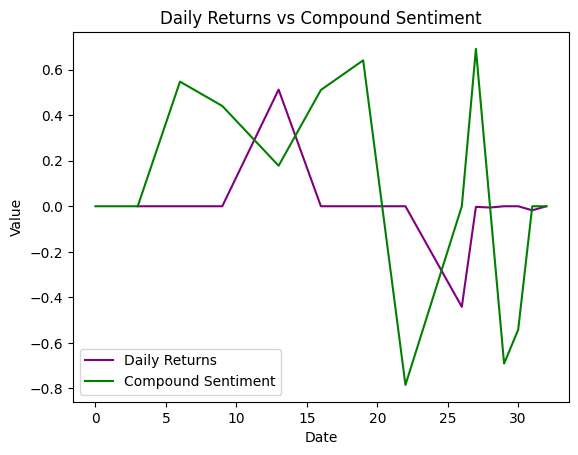

In [ ]:
import matplotlib.pyplot as plt


plt.plot(filtered_data.index, filtered_data['daily_return'], label='Daily Returns', color='purple')
plt.plot(filtered_data.index, filtered_data['compound_sentiment'], label='Compound Sentiment', color='green')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Daily Returns vs Compound Sentiment')
plt.legend()
plt.show()


Fluctuations: Both Daily Returns and Compound Sentiment show significant fluctuations, indicating variability in returns and sentiment over time.
Intersections: The points where the two lines intersect suggest moments when the sentiment and returns are in agreement.
Correlation: The graph may imply a correlation between sentiment and returns at specific times.

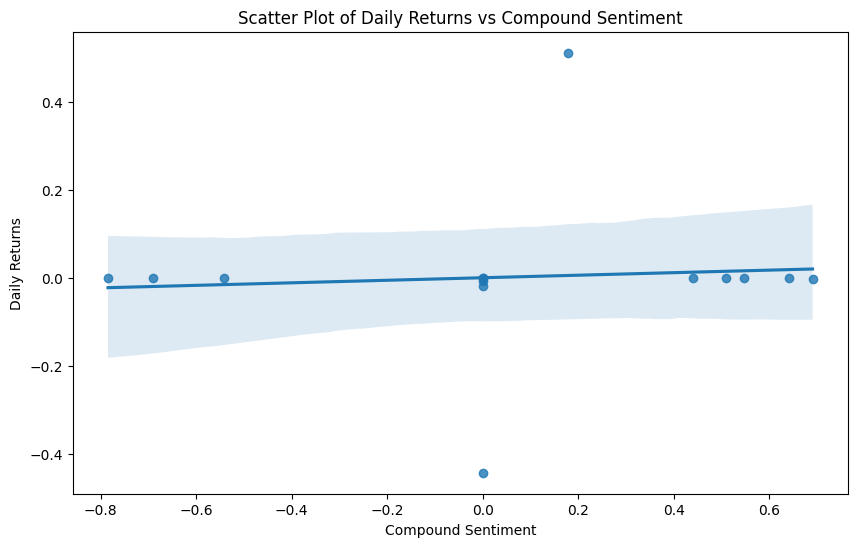

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x='compound_sentiment', y='daily_return', data=filtered_data)
plt.xlabel('Compound Sentiment')
plt.ylabel('Daily Returns')
plt.title('Scatter Plot of Daily Returns vs Compound Sentiment')
plt.show()


Data Points: The blue dots scattered across the plot represent individual data points for daily returns corresponding to their sentiment scores.
Trend Line: A blue line of best fit indicates a trend in the data, suggesting a potential relationship between sentiment scores and stock returns.
Confidence Interval: The shaded area around the line of best fit likely represents the confidence interval or error margin, indicating the reliability of the trend line.

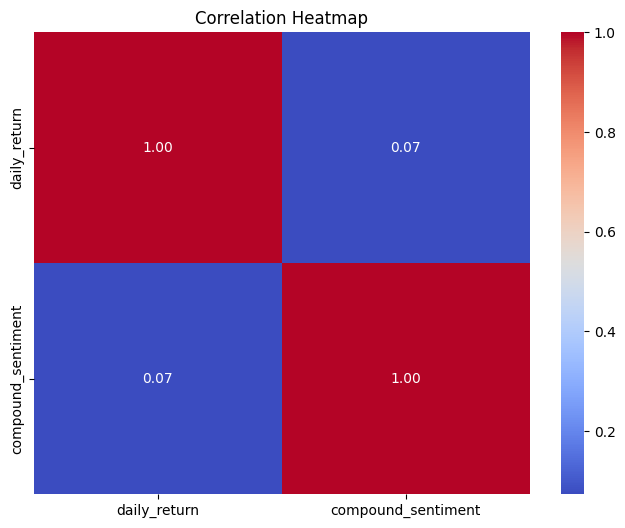

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_data[['daily_return', 'compound_sentiment']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Correlation Values: The heatmap shows correlation values between ‘daily_return’ and ‘compound_sentiment’. The diagonal values are 1.00, indicating a perfect correlation with themselves.
Weak Correlation: The off-diagonal values are 0.07, indicating a very weak positive correlation between daily returns and compound sentiment.
Interpretation: This suggests that there is little to no linear relationship between the sentiment of news articles and the daily returns of stocks.
The heatmap is a useful tool for visualizing the strength and direction of a relationship between two variables. In this case, it indicates that other factors might have a stronger influence on stock prices than the sentiment scores derived from news headlines

In [122]:
print(filtered_data['compound_sentiment'].dtype)
print(filtered_data['compound_sentiment'].head())


float64
0     0.0000
3     0.0000
6     0.5472
9     0.4404
13    0.1779
Name: compound_sentiment, dtype: float64


In [124]:
print(filtered_data.dtypes)


Date                   object
Ticker_symbol          object
headline_new           object
sentiment              object
Open                  float64
High                  float64
Low                   float64
Close                 float64
Adj Close             float64
Volume                float64
nltk_sentiment         object
textblob_sentiment    float64
daily_return          float64
compound_sentiment    float64
dtype: object


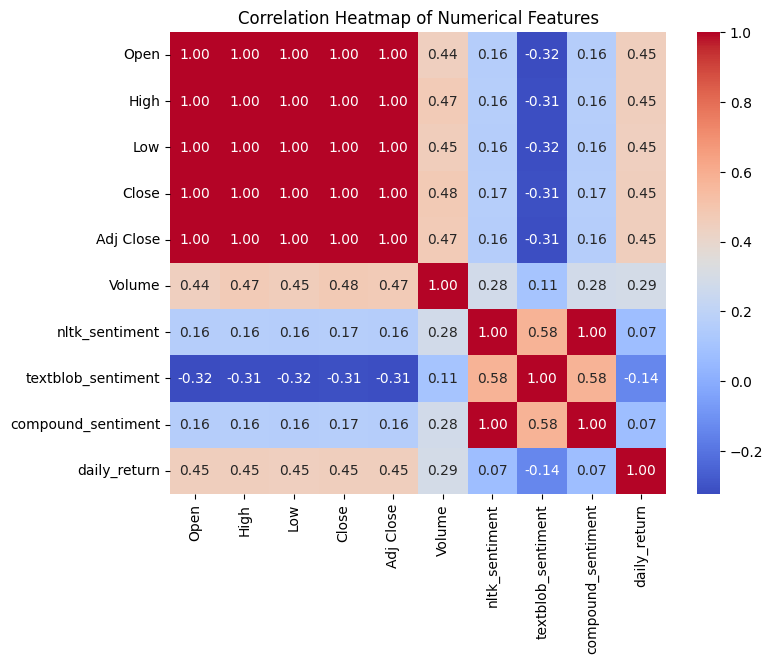

In [126]:
# Extract 'compound' sentiment score from the dictionary
filtered_data['nltk_sentiment'] = filtered_data['nltk_sentiment'].apply(lambda x: x['compound'])

# Convert 'nltk_sentiment' column to float64
filtered_data['nltk_sentiment'] = filtered_data['nltk_sentiment'].astype(float)

# Compute correlation matrix
correlation_matrix = filtered_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'nltk_sentiment', 'textblob_sentiment', 'compound_sentiment', 'daily_return']].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
